IMPORTING DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
import pickle

IMPORTING THE CALIFORNIA HOUSE PRICE DATA

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


In [ ]:
print(house_price_dataset)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# Loading dataset to Pandas dataFrame
House_price_dataframe = pd.DataFrame(house_price_dataset.data , columns= house_price_dataset.feature_names)
df = House_price_dataframe.copy()


In [ ]:
#Printing 5 rows of our DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#Add the target array(price) to the DataFrame
df['Price'] = house_price_dataset.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Checking for number of rows and column in the DataFrame
df.shape

(20640, 9)

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [ ]:
#Statistical form of Dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


ADDING NEW COLUMN "LOCATION"

In [ ]:
#making a dictionary named location__mapping

#df.loc-->used .loc to grab population/latitude/longitude from specific rows in the California Housing dataset
location_mapping = {
    "Los Angeles": {
        "Population": df.loc[0, "Population"],
        "Latitude": df.loc[0, "Latitude"],
        "Longitude": df.loc[0, "Longitude"]
    },
    "San Diego": {
        "Population": df.loc[50, "Population"],
        "Latitude": df.loc[50, "Latitude"],
        "Longitude": df.loc[50, "Longitude"]
    },

    "San Francisco": {
        "Population": df.loc[100, "Population"],
        "Latitude": df.loc[100, "Latitude"],
        "Longitude": df.loc[100, "Longitude"]
    },
    "San Jose": {
        "Population": df.loc[510, "Population"],
        "Latitude": df.loc[510, "Latitude"],
        "Longitude": df.loc[510, "Longitude"]
    },
    "Fresno": {
        "Population": df.loc[1000, "Population"],
        "Latitude": df.loc[1000, "Latitude"],
        "Longitude": df.loc[1000, "Longitude"]
    },
}

#Assign Locations
df["Location"] = ""
df.loc[:2000, "Location"] = "Los Angeles"   # first 2000 rows are Los Angeles
df.loc[2001:5000, "Location"] = "San Diego"
df.loc[5001:10000, "Location"] = "San Francisco"
df.loc[10001:15000, "Location"] = "San Jose"
df.loc[15001:, "Location"] = "Fresno"

#Fill values from mapping

#loc → the location name (e.g., "Los Angeles")
#vals → the dictionary of details for that location (population, latitude, longitude)

for loc, vals in location_mapping.items():
    mask = df["Location"] == loc
    df.loc[mask, "Population"] = vals["Population"]
    df.loc[mask, "Latitude"] = vals["Latitude"]
    df.loc[mask, "Longitude"] = vals["Longitude"]

In [ ]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880       322.0  2.109842     37.88   
2  7.2574      52.0  8.288136   1.073446       322.0  2.802260     37.88   
3  5.6431      52.0  5.817352   1.073059       322.0  2.547945     37.88   
4  3.8462      52.0  6.281853   1.081081       322.0  2.181467     37.88   

   Longitude  Price     Location  
0    -122.23  4.526  Los Angeles  
1    -122.23  3.585  Los Angeles  
2    -122.23  3.521  Los Angeles  
3    -122.23  3.413  Los Angeles  
4    -122.23  3.422  Los Angeles  


In [ ]:
#Checking for the correlation(+ve/-ve) between various features of Dataset
#Droping Location bcoz it is string & we can't generate correlation.

df_cell = df.drop('Location' , axis =1 )
correlation = df_cell.corr()

<Axes: >

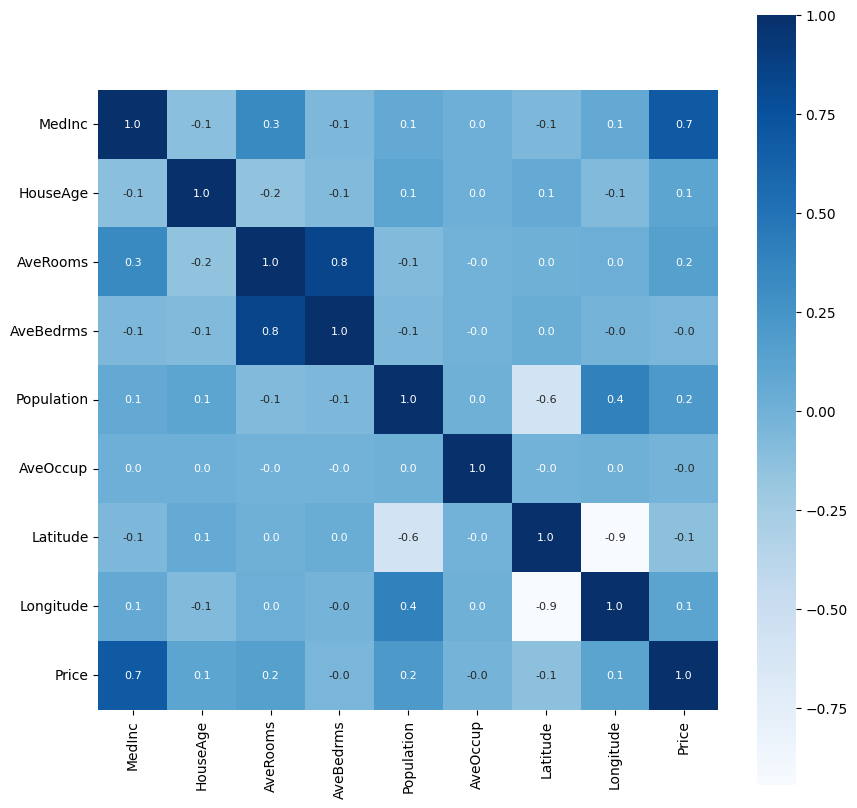

In [ ]:
#Constructing the Heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True , square= True , fmt='.1f' , annot=True , annot_kws= {'size':8},cmap = 'Blues' )

# cbar = colorbar ; square = all values to be in square ; fmt = amt of float value we want(.1f will give 1 value after decimal) ; annot = annotations ; annot_kws = annotation's size

In [ ]:
#Splitting the Data and Target(Price)

X =  df.drop(["AveOccup","Location","Price"], axis=1)
Y = df['Price']

In [ ]:
print(X)
print(Y)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880       322.0     37.88    -122.23
2      7.2574      52.0  8.288136   1.073446       322.0     37.88    -122.23
3      5.6431      52.0  5.817352   1.073059       322.0     37.88    -122.23
4      3.8462      52.0  6.281853   1.081081       322.0     37.88    -122.23
...       ...       ...       ...        ...         ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333      1919.0     37.69    -121.76
20636  2.5568      18.0  6.114035   1.315789      1919.0     37.69    -121.76
20637  1.7000      17.0  5.205543   1.120092      1919.0     37.69    -121.76
20638  1.8672      18.0  5.329513   1.171920      1919.0     37.69    -121.76
20639  2.3886      16.0  5.254717   1.162264      1919.0     37.69    -121.76

[20640 rows x 7 columns]
0        4.526
1        3.585
2       

In [ ]:
#Splitting the Data into Training data and Testing data

X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size= 0.2 , random_state = 2)

#test_size = 0.2 (means 20% testing data )

In [ ]:
#Checking wheather our data is splitted correctly

print(X.shape , X_train.shape , X_test.shape)

(20640, 7) (16512, 7) (4128, 7)


MODEL TRAINING

LINEAR REGRESSION

In [ ]:
#Loading the model
#model = LinearRegression()

When Used Linear Regression on testing data :

1>R squared error : 0.5370921011516163

2>Mean Absolute error : 0.5652839406332761

3>Mean squared error : 0.623548230470354



XGBOOST REGRESSION

In [ ]:
#Loading the model
model = XGBRegressor()

In [ ]:
#training the model with X_train

model.fit(X_train ,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

PREDICTION ON TRAINING DATA

In [ ]:
#performing prediction on training data

training_data_predict = model.predict(X_train)

In [ ]:
print(training_data_predict)

[0.9078933  2.7035773  0.81270623 ... 1.9079366  2.1738794  0.84089774]


EVALUATION

In [ ]:
# R squared error

score_1 = metrics.r2_score(Y_train , training_data_predict)

# Mean Absolute error

score_2 =  metrics.mean_absolute_error(Y_train , training_data_predict)

# Mean squared error

score_3 = metrics.mean_squared_error(Y_train , training_data_predict)

print("R squared error :" , score_1)
print("Mean Absolute error :" , score_2)
print("Mean squared error :" , score_3)

R squared error : 0.818693731135087
Mean Absolute error : 0.3571194917580061
Mean squared error : 0.24070614116627753


VISUALIZATION (ACTUAL PRICES V/S PREDICTED PRICES)

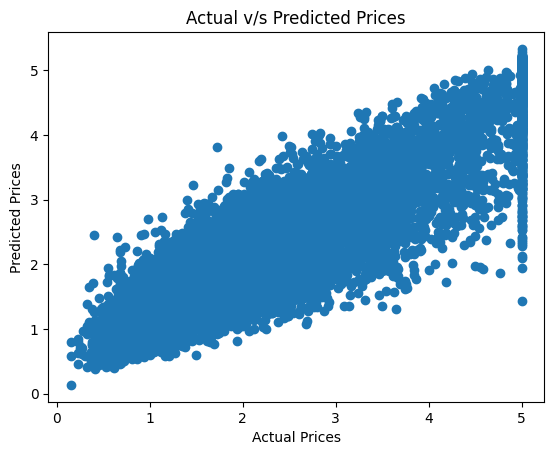

In [ ]:
plt.scatter(Y_train , training_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual v/s Predicted Prices")
plt.show()


PREDICTION ON TESTING DATA

In [ ]:
#performing prediction on testing data

testing_data_predict = model.predict(X_test)


In [ ]:
print(testing_data_predict)

[2.9066093  1.8342496  0.90041715 ... 1.6583234  0.98935574 2.2657921 ]


EVALUATION (TESTING DATA)

In [ ]:
# R squared error

score_1 = metrics.r2_score(Y_test , testing_data_predict)

# Mean Absolute error

score_2 =  metrics.mean_absolute_error(Y_test , testing_data_predict)

# Mean squared error

score_3 = metrics.mean_squared_error(Y_test , testing_data_predict)

print("R squared error :" , score_1)
print("Mean Absolute error :" , score_2)
print("Mean squared error :" , score_3)

R squared error : 0.6245921370201679
Mean Absolute error : 0.5008794924896517
Mean squared error : 0.5056835479543227


Lower MSE → Better error performance.

Higher R² → Better model fit.

Why used XGBoost:

1> XGBoost has lower MAE and MSE then linear regression → makes more precise predictions.

2> XGBoost R² ≈ 0.62 → explains 62% of price variance, a meaningful jump of 9% over Linear Regression’s 53%

In [ ]:
#Saving the model & location mapping
data_to_save = {
    "model": model,
    "location_mapping": location_mapping
}

with open("model_and_mapping.pkl", "wb") as file:
    pickle.dump(data_to_save, file)

In [ ]:
#Loading the saved model
loaded_model = pickle.load(open('model_and_mapping.pkl', 'rb'))